## Dieses Kaptiel befasst sich mit der ersten Sichtung der Daten und initiale Erkenntnisse die man daraus ziehen kann

In [18]:
# Zunächst werden die benötigten Bibliotheken importiert

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Die Daten vom store.csv und train.csv werden zusammengeführt und in einem Dataframe gespeichert

In [19]:
df1 = pd.read_csv("store.csv")
df2 = pd.read_csv("train.csv")

/tmp/ipykernel_11708/147419403.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("train.csv")


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [20]:
df2.head()
df2.tail()

# Die Zeilen werden nach ID zusammengefasst, die Summe der Werte werden gebildet und in einer neuen Tabelle gespeichert
df3 = df2.groupby("Store").sum()

/tmp/ipykernel_11708/136219299.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df2.groupby("Store").sum()


### Das Store und das modifizierte Train werden in einem großen Dataframe gespeichert

#### anschließend wird eine Heatmap erstellt um die Korrelationen zwischen der Sales und den Competition Spalten zu erkennen

<AxesSubplot: >

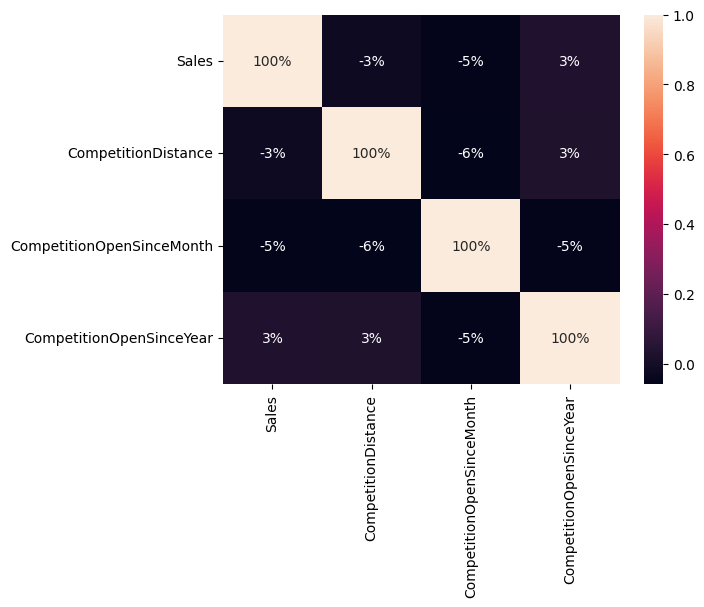

In [21]:
# Join the two dataframes using the Store column up to store id 1115 
df = pd.merge(df1, df3, on="Store")
df.head()

# plot the correltion between the columns sales and competition distance, competition open since month, competition open since year
sns.heatmap(df[["Sales", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]].corr(), annot=True, fmt=".0%")

### Eine Heatmap zeigt die Korrelationen zwischen allen Spalten

/tmp/ipykernel_11708/3540097586.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".0%")


<AxesSubplot: >

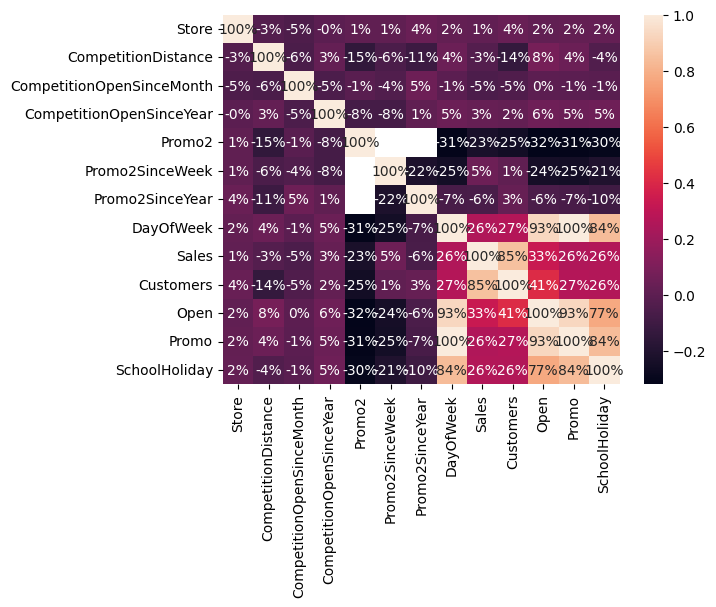

In [27]:
# plot a heatmap of the correlation between the columns

sns.heatmap(df.corr(), annot=True, fmt=".0%")

# make a 